<a href="https://colab.research.google.com/github/Yusupzk28/DataMining/blob/main/2318038DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Libraries**

Langkah pertama adalah mengimpor library yang dibutuhkan, yaitu pandas untuk mengolah data dan google.colab.drive untuk mengakses file di Google Drive.

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Load Dataset**

Setelah library siap, data hasil cleansing dimuat dari file Excel,
dengan menampilkan ukuran dataset serta lima baris data pertama.  Untuk memastikan file berhasil dibaca dan struktur datanya sesuai,

In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/2318038DataCleansing.xlsx')
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
print(dataset.head())

Ukuran dataset: 8803 baris dan 12 kolom

Lima data teratas:
  show_id     type                  title         director  \
0      s1    MOVIE   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV SHOW          Blood & Water          Unknown   
2      s3  TV SHOW              Ganglands  Julien Leclercq   
3      s4  TV SHOW  Jailbirds New Orleans          Unknown   
4      s5  TV SHOW           Kota Factory          Unknown   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                                NaN  United States   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added rating                                          listed_in  \
0 2021-09-25  PG-13                                      Documenta

# **3. Menambahkan Kolom year_added pada Dataset**

Pada tahap ini, kolom date_added diubah dulu ke format tanggal (datetime) supaya bisa diambil nilai tahunnya. Kolom baru ini digunakan untuk melihat tren pertumbuhan jumlah konten dari tahun ke tahun. Setelah itu, hasilnya ditampilkan dengan dataset[['title', 'date_added', 'year_added']].head() untuk memastikan kolom tahun sudah terbentuk dengan benar.

In [ ]:
# Ubah kolom tanggal jadi datetime dan ambil tahunnya
dataset['date_added'] = pd.to_datetime(dataset['date_added'], errors='coerce')
dataset['year_added'] = dataset['date_added'].dt.year

# Tampilkan hasil kolom baru
dataset[['title', 'date_added', 'year_added']].head()


,title,date_added,year_added
0,Dick Johnson Is Dead,2021-09-25,2021
1,Blood & Water,2021-09-24,2021
2,Ganglands,2021-09-24,2021
3,Jailbirds New Orleans,2021-09-24,2021
4,Kota Factory,2021-09-24,2021


# **4. Menambahkan Kolom “Jumlah Konten per Tahun”**

Proses ini mengelompokkan data berdasarkan tahun (year_added) lalu menghitung jumlah baris (show_id) di tiap tahun. Hasilnya disimpan sebagai dataset baru bernama dataset_trend dengan dua kolom, yaitu year_added dan total_content.

In [ ]:
# Hitung jumlah konten per tahun
dataset_trend = dataset.groupby('year_added')['show_id'].count().reset_index()
dataset_trend.rename(columns={'show_id': 'total_content'}, inplace=True)
dataset_trend.head()


,year_added,total_content
0,2008,2
1,2009,2
2,2010,1
3,2011,13
4,2012,3


# **5. Agregasi Data**

Langkah ini befungsi untuk memastikan urutan tahun tidak acak dan mudah dibaca saat ditampilkan.

In [ ]:
dataset_trend.sort_values('year_added', inplace=True)
print(dataset_trend)


    year_added  total_content
0         2008              2
1         2009              2
2         2010              1
3         2011             13
4         2012              3
5         2013             10
6         2014             23
7         2015             73
8         2016            417
9         2017           1161
10        2018           1624
11        2019           2098
12        2020           1878
13        2021           1498


# **6. Membuat Line Chart Tren Pertumbuhan Konten**

Berikutnya adalah menampilkan tren pertumbuhan jumlah konten Netflix per tahun dalam line chart dengan memanggil library Matplotlib untuk membuat grafik garis. Sumbu-X menunjukkan tahun, sedangkan sumbu-Y menunjukkan jumlah konten. Hasilnya memperlihatkan pola pertambahan konten dari waktu ke waktu.

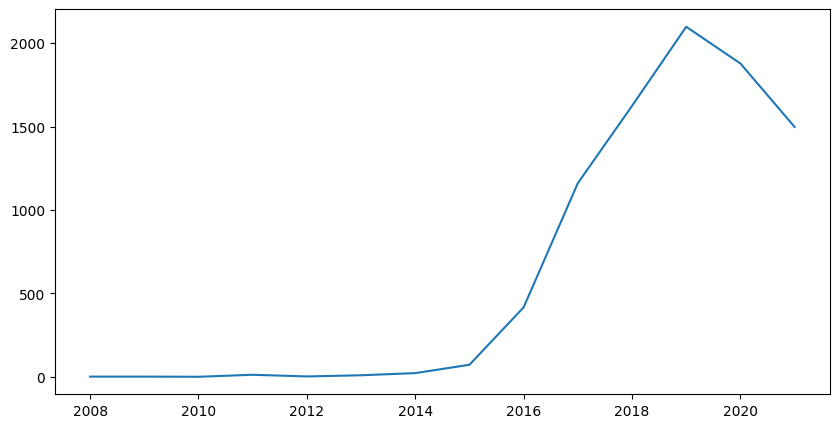

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(dataset_trend['year_added'], dataset_trend['total_content'])
plt.show()


# **7. Mengubah Ukuran Figure**

Supaya grafik lebih lebar dan nyaman dilihat, ukuran figure diatur ulang.

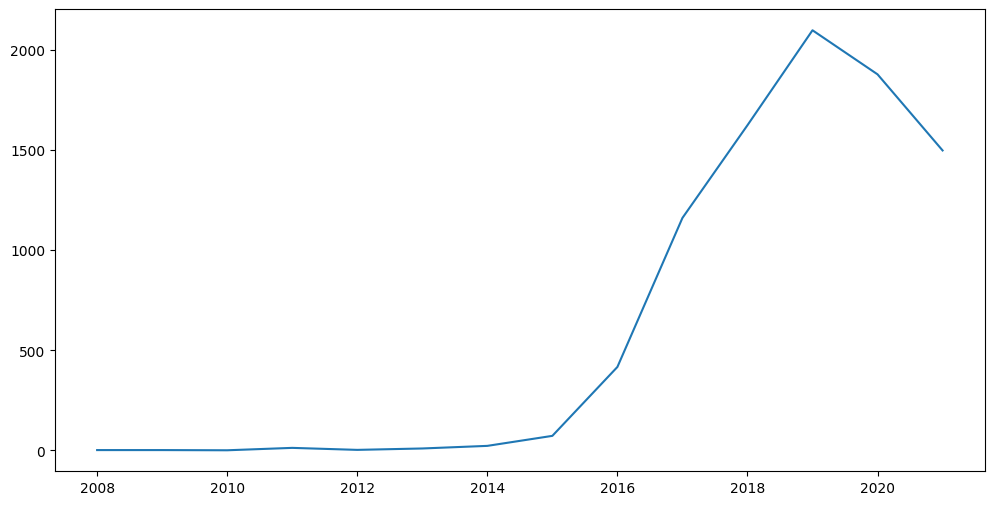

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(dataset_trend['year_added'], dataset_trend['total_content'])
plt.show()


# **8. Menambahkan Judul dan Label**

Setelah grafik muncul, perlu ditambahkan judul serta label untuk sumbu-X dan Y agar tahu informasi apa yang di line chart tersebut.

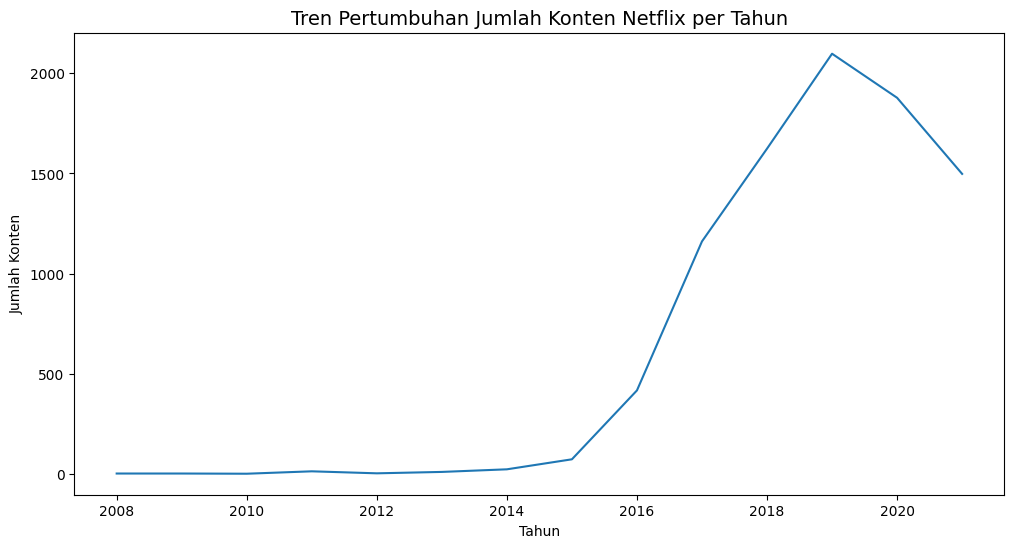

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(dataset_trend['year_added'], dataset_trend['total_content'])

plt.title('Tren Pertumbuhan Jumlah Konten Netflix per Tahun', fontsize=14)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Konten')
plt.show()

# **9. Kustomisasi Garis dan Titik**

Agar tampilan line chartnya lebih menarik, gaya garis dan titik pada grafik dikustomisasi.

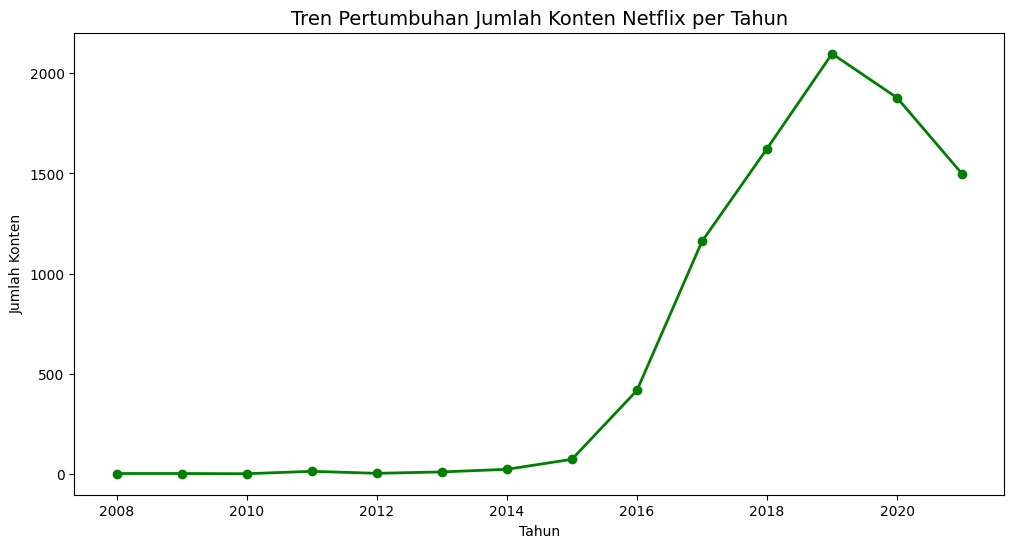

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(
    dataset_trend['year_added'],
    dataset_trend['total_content'],
    marker='o',
    linewidth=2,
    color='green'
)

plt.title('Tren Pertumbuhan Jumlah Konten Netflix per Tahun', fontsize=14)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Konten')
plt.show()


# **10. Kustomisasi Grid**

Grid ditambhakan agar bisa melihat posisi titik terhadap sumbu lebih jelas.

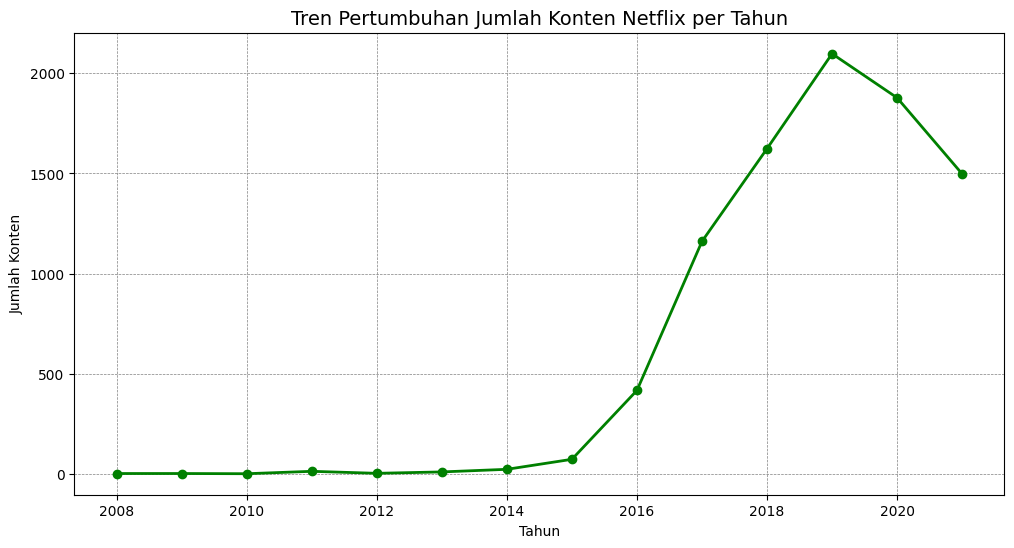

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(dataset_trend['year_added'], dataset_trend['total_content'], marker='o', linewidth=2, color='green')

plt.title('Tren Pertumbuhan Jumlah Konten Netflix per Tahun', fontsize=14)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Konten')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()


# **11. Menambahkan Informasi pada Grafik**

Terakhir adalah menambahkan label angka di tiap titik agar nilai jumlah konten per tahun bisa langsung terlihat tanpa menebak dari sumbu-Y.

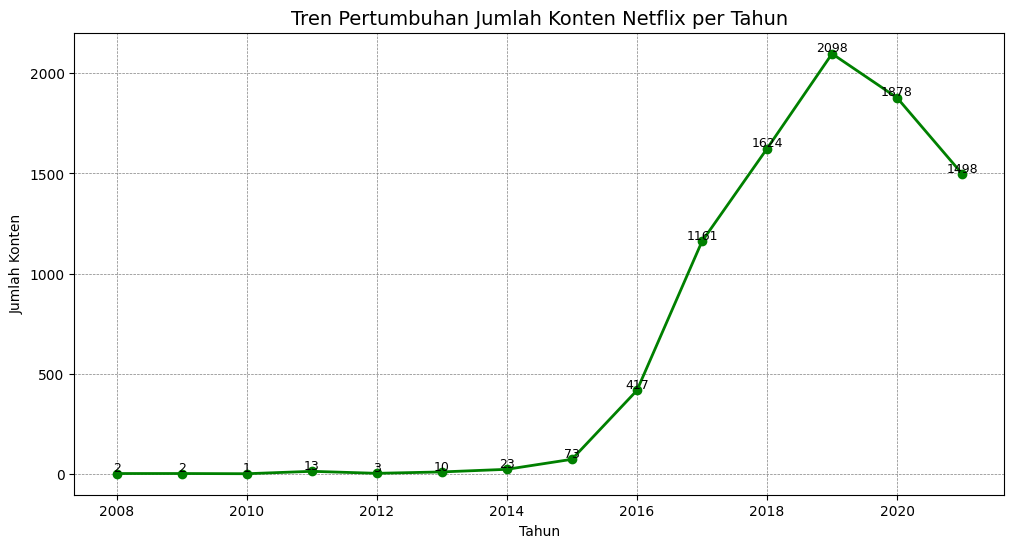

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(dataset_trend['year_added'], dataset_trend['total_content'], marker='o', linewidth=2, color='green')

plt.title('Tren Pertumbuhan Jumlah Konten Netflix per Tahun', fontsize=14)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Konten')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Tambahkan label angka di tiap titik
for i in range(len(dataset_trend)):
    plt.text(
        dataset_trend['year_added'].iloc[i],
        dataset_trend['total_content'].iloc[i] + 10,
        str(dataset_trend['total_content'].iloc[i]),
        ha='center',
        fontsize=9
    )

plt.show()
